C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453 

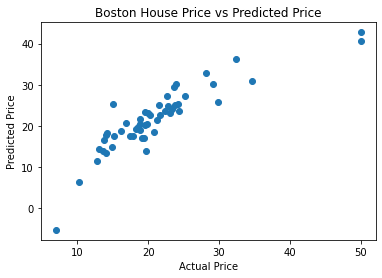

R-squared value on training dataset: 0.738
R-squared value on testing dataset: 0.760
Mean Absolute Error: 2.834
Mean Squared Error: 14.996
Root Mean Squared Error: 3.872
10% of Mean Value of target: 2.109


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head(2))
df['PRICE'] = boston.target
print(df.head(2))
print(df.describe())
x_train, x_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.10, random_state=42
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model = LinearRegression()
model.fit(x_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept: %.3f" % model.intercept_)
y_pred = model.predict(x_test)
print("First 5 predictions:", y_pred[:5])
print("Actual vs Predicted:")
print(np.column_stack((y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Boston House Price vs Predicted Price')
plt.show()
print("R-squared value on training dataset: %.3f" % model.score(x_train, y_train))
print("R-squared value on testing dataset: %.3f" % model.score(x_test, y_test))

print("Mean Absolute Error: %.3f" % metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: %.3f" % metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.3f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean_value = np.mean(y_test)
print("10%% of Mean Value of target: %.3f" % (mean_value * 0.10))
